In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint
)

In [254]:
df = pd.read_csv("House.csv")

In [255]:
df = df[df["price"] > 0]


In [256]:
df.shape

(4551, 18)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float64(4)

In [258]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


In [259]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [260]:
df.duplicated().sum()


np.int64(0)

In [261]:
df.nunique().sort_values(ascending=False)


street           4476
sqft_lot         3087
price            1740
sqft_living       561
sqft_above        510
sqft_basement     207
yr_built          115
statezip           77
date               70
yr_renovated       59
city               44
bathrooms          26
bedrooms           10
floors              6
view                5
condition           5
waterfront          2
country             1
dtype: int64

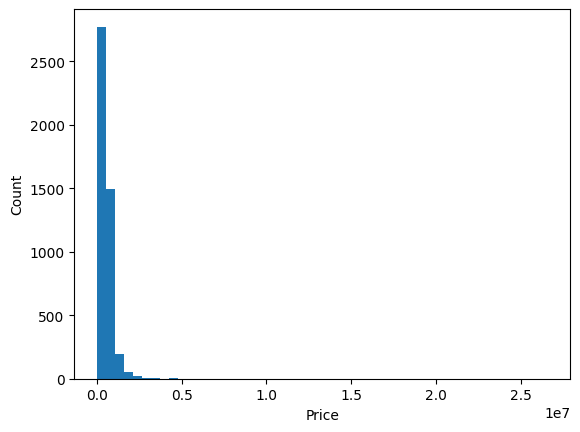

In [262]:
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


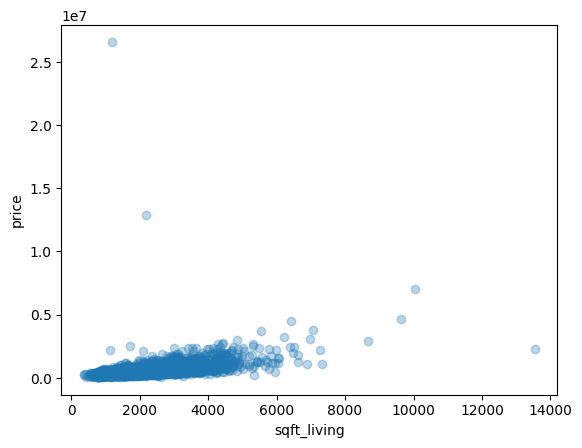

In [263]:
plt.scatter(df["sqft_living"], df["price"], alpha=0.3)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()


In [264]:
df.groupby("city")["price"].mean().sort_values(ascending=False).head(10)


city
Medina                2.046559e+06
Clyde Hill            1.615711e+06
Yarrow Point          1.194838e+06
Mercer Island         1.178638e+06
Bellevue              8.622551e+05
Beaux Arts Village    7.450000e+05
Sammamish             7.029858e+05
Fall City             6.926818e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64

In [265]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [266]:
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df = df.drop(columns=["date"])


In [267]:
df["house_age"] = df["year"] - df["yr_built"]
df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)


In [268]:
from sklearn.preprocessing import LabelEncoder

for col in ["street", "country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [269]:
df = pd.get_dummies(df, columns=["city", "statezip"], drop_first=True)


In [270]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,country,year,month,day,house_age,was_renovated,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,statezip_WA 98005,statezip_WA 98006,statezip_WA 98007,statezip_WA 98008,statezip_WA 98010,statezip_WA 98011,statezip_WA 98014,statezip_WA 98019,statezip_WA 98022,statezip_WA 98023,statezip_WA 98024,statezip_WA 98027,statezip_WA 98028,statezip_WA 98029,statezip_WA 98030,statezip_WA 98031,statezip_WA 98032,statezip_WA 98033,statezip_WA 98034,statezip_WA 98038,statezip_WA 98039,statezip_WA 98040,statezip_WA 98042,statezip_WA 98045,statezip_WA 98047,statezip_WA 98050,statezip_WA 98051,statezip_WA 98052,statezip_WA 98053,statezip_WA 98055,statezip_WA 98056,statezip_WA 98057,statezip_WA 98058,statezip_WA 98059,statezip_WA 98065,statezip_WA 98068,statezip_WA 98070,statezip_WA 98072,statezip_WA 98074,statezip_WA 98075,statezip_WA 98077,statezip_WA 98092,statezip_WA 98102,statezip_WA 98103,statezip_WA 98105,statezip_WA 98106,statezip_WA 98107,statezip_WA 98108,statezip_WA 98109,statezip_WA 98112,statezip_WA 98115,statezip_WA 98116,statezip_WA 98117,statezip_WA 98118,statezip_WA 98119,statezip_WA 98122,statezip_WA 98125,statezip_WA 98126,statezip_WA 98133,statezip_WA 98136,statezip_WA 98144,statezip_WA 98146,statezip_WA 98148,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1507,0,2014,5,2,59,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3853,0,2014,5,2,93,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2267,0,2014,5,2,48,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fa

In [271]:
import numpy as np
y = np.log1p(df["price"])
X = df.drop("price", axis=1)


In [272]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,country,year,month,day,house_age,was_renovated,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,statezip_WA 98005,statezip_WA 98006,statezip_WA 98007,statezip_WA 98008,statezip_WA 98010,statezip_WA 98011,statezip_WA 98014,statezip_WA 98019,statezip_WA 98022,statezip_WA 98023,statezip_WA 98024,statezip_WA 98027,statezip_WA 98028,statezip_WA 98029,statezip_WA 98030,statezip_WA 98031,statezip_WA 98032,statezip_WA 98033,statezip_WA 98034,statezip_WA 98038,statezip_WA 98039,statezip_WA 98040,statezip_WA 98042,statezip_WA 98045,statezip_WA 98047,statezip_WA 98050,statezip_WA 98051,statezip_WA 98052,statezip_WA 98053,statezip_WA 98055,statezip_WA 98056,statezip_WA 98057,statezip_WA 98058,statezip_WA 98059,statezip_WA 98065,statezip_WA 98068,statezip_WA 98070,statezip_WA 98072,statezip_WA 98074,statezip_WA 98075,statezip_WA 98077,statezip_WA 98092,statezip_WA 98102,statezip_WA 98103,statezip_WA 98105,statezip_WA 98106,statezip_WA 98107,statezip_WA 98108,statezip_WA 98109,statezip_WA 98112,statezip_WA 98115,statezip_WA 98116,statezip_WA 98117,statezip_WA 98118,statezip_WA 98119,statezip_WA 98122,statezip_WA 98125,statezip_WA 98126,statezip_WA 98133,statezip_WA 98136,statezip_WA 98144,statezip_WA 98146,statezip_WA 98148,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1507,0,2014,5,2,59,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3853,0,2014,5,2,93,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2267,0,2014,5,2,48,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False

In [273]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [274]:

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, pred_lr)

print("Baseline MAE:", mae_lr)


Baseline MAE: 0.16602809239809416


In [275]:

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="linear")
])

model.compile(loss='mean_squared_error',
              metrics=['mae'])

model.summary()


C:\Users\Welcome\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 64)             │         8,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [276]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", patience=6, factor=0.5)
]

history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54.9368 - mae: 6.3668 - val_loss: 3.9353 - val_mae: 1.3882 - learning_rate: 0.0010
Epoch 2/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2275 - mae: 2.6180 - val_loss: 1.6551 - val_mae: 0.7864 - learning_rate: 0.0010
Epoch 3/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9458 - mae: 2.5047 - val_loss: 1.2602 - val_mae: 0.7956 - learning_rate: 0.0010
Epoch 4/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8909 - mae: 2.3613 - val_loss: 1.2222 - val_mae: 0.8353 - learning_rate: 0.0010
Epoch 5/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1465 - mae: 2.2789 - val_loss: 1.3798 - val_mae: 0.9985 - learning_rate: 0.0010
Epoch 6/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3178 - mae: 2.1748 - val_loss: 1.0019 - val_mae: 0.8042 - learning_rate: 0.0010
Epoch 7/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6044 - mae: 2.2259 - val_loss: 1.2050 - val_mae: 0.9313 - learning_rate: 0.0010
Epoc

In [277]:
y_pred = model.predict(X_test)

y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

mae_dollars = mean_absolute_error(y_test_actual, y_pred_actual)
print("ANN MAE ($):", mae_dollars)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ANN MAE ($): 224247.70028351012


In [278]:
y_pred_actual = y_pred_actual.flatten()


In [279]:
import pandas as pd

results = pd.DataFrame({
    "Actual Price ($)": y_test_actual[:10],
    "Predicted Price ($)": y_pred_actual[:10]
})

results


,Actual Price ($),Predicted Price ($)
471,1225000.0,1.026563e+06
2518,496752.0,5.138236e+05
23,612500.0,9.133386e+05
3922,265000.0,3.093241e+05
135,615000.0,9.067808e+05
1789,432000.0,5.635972e+05
3335,305000.0,2.356092e+05
2374,405000.0,5.087788e+05
2320,349000.0,6.024431e+05
3260,839000.0,9.950172e+05


In [282]:
results["Error ($)"] = results["Predicted Price ($)"] - results["Actual Price ($)"]
results


,Actual Price ($),Predicted Price ($),Error ($)
471,"1,225,000.00","1,026,563.38","-198,436.63"
2518,"496,752.00","513,823.59","17,071.59"
23,"612,500.00","913,338.62","300,838.63"
3922,"265,000.00","309,324.06","44,324.06"
135,"615,000.00","906,780.75","291,780.75"
1789,"432,000.00","563,597.25","131,597.25"
3335,"305,000.00","235,609.22","-69,390.78"
2374,"405,000.00","508,778.75","103,778.75"
2320,"349,000.00","602,443.12","253,443.13"
3260,"839,000.00","995,017.25","156,017.25"
